In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.8
nruns = 10
ouput_name = 'XGBRegressor_glass_rate08'  


data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                  sep = ",", header = None)
data = data.drop([0],axis=1).reset_index(drop=True) #remove the id column
# data.columns = range(data.shape[1]) #reset column index starting from 0
data.head()


Instructions for updating:
non-resource variables are not supported in the long term


,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
data.colums = str(data.columns)

In [3]:
y = data.iloc[:,9].to_numpy()-1#to start the class from 0
G = len(np.unique(y))
X = data.iloc[:, range(9)]
X.head()

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [4]:
def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    encoder = LabelEncoder()
    encoder.fit(y_train)
    y_train = pd.DataFrame(encoder.transform(y_train))
    y_test = pd.DataFrame(encoder.transform(y_test))    
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test

chosen_model = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

# Generate missing data, impute, and use SHAP to explain

In [5]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model, get_spearrman = False))

C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 0
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 69.00it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 89.09it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 89.97it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.91it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.69it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 92.05it/s]


Validation result: best alpha 1.0, best score 0.7723708799549195, scores {0.0: 7.008557529826975, 0.01: 1.5079341678549423, 0.1: 0.9263520473635459, 1.0: 0.7723708799549195, 10.0: 0.8108723494073242, 100.0: 0.8241015955159927}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 170.18it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.18it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.21it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 89.80it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 84.18it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.12it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.20it/s]


Validation result: best alpha 1.0, best score 0.7723708799549195, scores {0.0: 7.008557529826975, 0.01: 1.5079341678549423, 0.1: 0.9263520473635459, 1.0: 0.7723708799549195, 10.0: 0.8108723494073241, 100.0: 0.8241015955159927}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 354.01it/s]


loss 0.5661457931368529
loss 0.929797893823382
loss 0.7187604673244509
loss 0.9967719687933065
loss 0.9259523174508101
loss 0.9276918812388919
loss 0.9491374543211247
loss 1.1113823811256962
loss 0.8765377527499693
loss 0.9647089809481346
number of runs used by missForest: 10
loss: 0.9647089809481346
loss 0.5689105435972769
loss 0.7654912884054604
loss 0.6393273763842516
loss 0.5107174382864988
loss 0.5558773685721305
loss 0.4746444686571875
loss 0.5401534809027952
loss 0.550284139031835
loss 0.629108457218222
loss 0.4596376827216765
number of runs used by missForest: 10
loss: 0.4596376827216765



100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 659.35it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 1
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 62.63it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 82.18it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 82.28it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.22it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 78.06it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 78.51it/s]


Validation result: best alpha 1.0, best score 0.9861327997856084, scores {0.0: 1.6994705214590256, 0.01: 4.913413493994928, 0.1: 9.63940260319661, 1.0: 0.9861327997856084, 10.0: 1.0689388481569084, 100.0: 1.0968612516644005}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 155.01it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 79.75it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 81.05it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 80.94it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 78.45it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 79.08it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 81.85it/s]


Validation result: best alpha 1.0, best score 0.9861327997856085, scores {0.0: 1.6994705214590256, 0.01: 4.913413493994928, 0.1: 9.63940260319661, 1.0: 0.9861327997856085, 10.0: 1.0689388481569084, 100.0: 1.0968612516644005}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 460.35it/s]


loss 0.5227525444174862
loss 0.6780380521956573
loss 0.5149884044538021
loss 0.30400057474581
loss 0.247640620248656
loss 0.20166295812240023
loss 0.24130617426083548
loss 0.2531846848881892
loss 0.1958734069987256
loss 0.16903812731821727
number of runs used by missForest: 10
loss: 0.16903812731821727
loss 0.4960295757095867
loss 0.5344000388625125
loss 0.2906214521477054
loss 0.2069329316970648
loss 0.2490824884232667
loss 0.2581871239198574
loss 0.18009105445897214
loss 0.16635442409851228
loss 0.14759567205745827
loss 0.126676122797246
number of runs used by missForest: 10
loss: 0.126676122797246


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 681.80it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 2
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 72.28it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.91it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.78it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.52it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.29it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.61it/s]


Validation result: best alpha 1.0, best score 0.7925158585285499, scores {0.0: 4.168022305751738, 0.01: 2.0335618540487608, 0.1: 0.8165430810396387, 1.0: 0.7925158585285499, 10.0: 0.8727590986551369, 100.0: 0.8937388273579913}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 160.24it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.82it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 84.84it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 89.05it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.71it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 92.09it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.00it/s]


Validation result: best alpha 1.0, best score 0.7925158585285499, scores {0.0: 4.168022305751739, 0.01: 2.0335618540487603, 0.1: 0.8165430810396387, 1.0: 0.7925158585285499, 10.0: 0.8727590986551369, 100.0: 0.8937388273579913}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 357.75it/s]


loss 0.3945279248449653
loss 0.6416253366601302
loss 0.5856330617484238
loss 0.5757044729797366
loss 0.5140210077228009
loss 0.5010373176491857
loss 0.441218423841714
loss 0.5566998323209288
loss 0.4537242258073284
loss 0.41714898341506085
number of runs used by missForest: 10
loss: 0.41714898341506085
loss 0.4374230231205193
loss 0.6318428386082753
loss 0.5360907104306102
loss 0.5261933254565714
loss 0.5039830752107095
loss 0.5007508923177525
loss 0.48907108360072926
loss 0.4726953401818698
loss 0.4031202846617161
loss 0.4194051729436343
number of runs used by missForest: 10
loss: 0.4194051729436343


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 682.80it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 3
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 73.43it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.95it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.64it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.56it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.22it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.00it/s]


Validation result: best alpha 1.0, best score 0.897522238600437, scores {0.0: 4.86390103112815, 0.01: 57.94260537272758, 0.1: 1.5403233705061328, 1.0: 0.897522238600437, 10.0: 0.961518140276225, 100.0: 0.9833582418427789}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 167.82it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.76it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.75it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 84.89it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.12it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.09it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.96it/s]


Validation result: best alpha 1.0, best score 0.897522238600437, scores {0.0: 4.86390103112815, 0.01: 57.942605372727584, 0.1: 1.5403233705061328, 1.0: 0.897522238600437, 10.0: 0.9615181402762251, 100.0: 0.9833582418427789}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 447.12it/s]


loss 0.519269423773458
loss 0.9203540239211127
loss 0.5754396253347704
loss 0.5459838680256545
loss 0.6597322153687823
loss 0.584151144824255
loss 0.460602344798914
loss 0.42458530623821966
loss 0.3540524169267127
loss 0.2953385568639531
number of runs used by missForest: 10
loss: 0.2953385568639531
loss 0.5089607405401729
loss 1.0356895417222196
loss 0.9788190638217128
loss 0.9930344503560832
loss 1.0400160688357865
loss 0.8252469662230701
loss 0.9545475901974529
loss 0.9104120729995784
loss 0.8376968594521538
loss 0.8284368240475454
number of runs used by missForest: 10
loss: 0.8284368240475454


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 661.07it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 4
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 73.86it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 98.46it/s]


Running Cross Validation, alpha=0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 102.17it/s]


Running Cross Validation, alpha=1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 100.01it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.95it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.70it/s]


Validation result: best alpha 1.0, best score 0.8925236048619708, scores {0.0: 1.266837282983961, 0.01: 1.1657789144816517, 0.1: 2.801425977162613, 1.0: 0.8925236048619708, 10.0: 0.9985522941319501, 100.0: 1.0275246371831401}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 182.05it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 100.24it/s]


Running Cross Validation, alpha=0.01


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 100.65it/s]


Running Cross Validation, alpha=0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 103.77it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 98.54it/s]


Running Cross Validation, alpha=10.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 104.34it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.63it/s]


Validation result: best alpha 1.0, best score 0.8925236048619707, scores {0.0: 1.266837282983961, 0.01: 1.1657789144816517, 0.1: 2.801425977162613, 1.0: 0.8925236048619707, 10.0: 0.9985522941319501, 100.0: 1.0275246371831401}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 559.22it/s]


loss 0.5646520261416464
loss 1.070074550096847
loss 0.7353163482769995
loss 0.7762231309458616
loss 0.6009228349570299
loss 0.39877714764309574
loss 0.31930842996866227
loss 0.3478130101479523
loss 0.32463013580282574
loss 0.29754892244919595
number of runs used by missForest: 10
loss: 0.29754892244919595
loss 0.5626482870056149
loss 0.9747306522470178
loss 0.5727155911945334
loss 0.6641251375730661
loss 0.6315638855999558
loss 0.5464743435275669
loss 0.4916197718142269
loss 0.44610007797457313
loss 0.4086870687097352
loss 0.37900785932720615
number of runs used by missForest: 10
loss: 0.37900785932720615


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 641.89it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 5
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 71.24it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 89.21it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.65it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 89.84it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.59it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.79it/s]


Validation result: best alpha 1.0, best score 1.0036387115142384, scores {0.0: 1.5667167745487791, 0.01: 1.5014013136470192, 0.1: 9.128629571052242, 1.0: 1.0036387115142384, 10.0: 1.1139944136828586, 100.0: 1.156181229034684}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 163.15it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.87it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 89.49it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 84.02it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.64it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.22it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.20it/s]


Validation result: best alpha 1.0, best score 1.0036387115142382, scores {0.0: 1.5667167745487791, 0.01: 1.5014013136470192, 0.1: 9.128629571052242, 1.0: 1.0036387115142382, 10.0: 1.1139944136828588, 100.0: 1.156181229034684}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 666.29it/s]


loss 0.5284867857255044
loss 0.9349851604025918
loss 0.4198545513323926
loss 0.3685967417173005
loss 0.5500910347527196
loss 0.9198072073146358
loss 0.4240735145085567
loss 0.24789999688562184
loss 0.16489333093987296
loss 0.15633523200305374
number of runs used by missForest: 10
loss: 0.15633523200305374
loss 0.5058148725393186
loss 0.8077197534449495
loss 0.5466935309064491
loss 0.6379764295567282
loss 0.42414216279590233
loss 0.4241929317856985
loss 0.3846420617333088
loss 0.3320749704452558
loss 0.32721828028830274
loss 0.28212903406116213
number of runs used by missForest: 10
loss: 0.28212903406116213


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 631.53it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 6
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 76.48it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.13it/s]


Running Cross Validation, alpha=0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 101.43it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.60it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.31it/s]


Running Cross Validation, alpha=100.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 101.55it/s]


Validation result: best alpha 1.0, best score 0.8575929963872444, scores {0.0: 3.4947906870078684, 0.01: 14.402329155390174, 0.1: 1.5463254534894657, 1.0: 0.8575929963872444, 10.0: 0.9331851065332509, 100.0: 0.971316477113495}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 184.55it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.72it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.80it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.45it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.06it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.73it/s]


Running Cross Validation, alpha=100.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 100.40it/s]


Validation result: best alpha 1.0, best score 0.8575929963872445, scores {0.0: 3.494790687007869, 0.01: 14.402329155390175, 0.1: 1.5463254534894657, 1.0: 0.8575929963872445, 10.0: 0.9331851065332509, 100.0: 0.971316477113495}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 350.30it/s]


loss 0.4798944270822186
loss 0.5910747732511765
loss 0.49152912113744895
loss 0.4938511393394486
loss 0.4748903990761389
loss 0.36392406638117497
loss 0.43275203287647246
loss 0.4783902202635791
loss 0.38271997488694875
loss 0.43524630239239764
number of runs used by missForest: 10
loss: 0.43524630239239764
loss 0.4908133764408782
loss 0.6217268837711004
loss 0.6319060872529304
loss 0.5914029623937599
loss 0.651812779998051
loss 0.5823255999843454
loss 0.6254048370624311
loss 0.5396020215217825
loss 0.4961378099936563
loss 0.5051115892758052
number of runs used by missForest: 10
loss: 0.5051115892758052


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 603.24it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 7
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.97it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.47it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 75.47it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.49it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.35it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.41it/s]


Validation result: best alpha 1.0, best score 0.8566771617778051, scores {0.0: 1.7593240545572635, 0.01: 1.4883249490434327, 0.1: 1.1772065192296801, 1.0: 0.8566771617778051, 10.0: 0.9500270756099102, 100.0: 0.9772310670030759}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 178.39it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 79.05it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.90it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.25it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.59it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.76it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.72it/s]


Validation result: best alpha 1.0, best score 0.8566771617778051, scores {0.0: 1.7593240545572633, 0.01: 1.4883249490434327, 0.1: 1.1772065192296801, 1.0: 0.8566771617778051, 10.0: 0.9500270756099103, 100.0: 0.9772310670030758}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 581.35it/s]


loss 0.49580919296431625
loss 0.6721080422589822
loss 0.34509985052293524
loss 0.2723626347143402
loss 0.22386630488905399
loss 0.16810328144657427
loss 0.1370174566397915
loss 0.09746950967688989
loss 0.09785090470853763
loss 0.10800237577860766
number of runs used by missForest: 10
loss: 0.10800237577860766
loss 0.5213326725924604
loss 0.6649354942625706
loss 0.3928528315439732
loss 0.3706969331438513
loss 0.2596964575514548
loss 0.24514296676316993
loss 0.2731532721123738
loss 0.2321497683676103
loss 0.2105606513868072
loss 0.09772048005679762
number of runs used by missForest: 10
loss: 0.09772048005679762


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 616.76it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 8
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 73.11it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.31it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.13it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.59it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.50it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.34it/s]


Validation result: best alpha 1.0, best score 0.8194966756792503, scores {0.0: 3.5758925308474887, 0.01: 2.0801341020202826, 0.1: 2.6387498784165744, 1.0: 0.8194966756792503, 10.0: 0.9161691285319593, 100.0: 0.9460231879381769}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 165.82it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.99it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.83it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.54it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.60it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.82it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.05it/s]


Validation result: best alpha 1.0, best score 0.8194966756792503, scores {0.0: 3.5758925308474883, 0.01: 2.0801341020202826, 0.1: 2.6387498784165744, 1.0: 0.8194966756792503, 10.0: 0.9161691285319593, 100.0: 0.9460231879381769}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 596.10it/s]


loss 0.5327085653786998
loss 0.8953632305696133
loss 0.5665821327929932
loss 0.6767807174501443
loss 0.728260251462762
loss 0.534786338997916
loss 0.6026000333242804
loss 0.44572839115266666
loss 0.43210550213247967
loss 0.3614060425753009
number of runs used by missForest: 10
loss: 0.3614060425753009
loss 0.5263454766952395
loss 0.9426918053381864
loss 0.6480027563022205
loss 0.6964199172436091
loss 0.6768768967591022
loss 0.692030547065539
loss 0.7660628145351231
loss 0.6882375808616745
loss 0.6981535020494846
loss 0.6385937709165986
number of runs used by missForest: 10
loss: 0.6385937709165986


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 608.05it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 9
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 73.86it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.85it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.48it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.60it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.80it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.12it/s]


Validation result: best alpha 1.0, best score 0.863642252278787, scores {0.0: 1.1638134512317775, 0.01: 1.0976959602878653, 0.1: 1.1759727758882899, 1.0: 0.863642252278787, 10.0: 0.9484804906660658, 100.0: 0.9723443873118685}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 163.89it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.99it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.49it/s]


Running Cross Validation, alpha=0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 100.08it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.92it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.58it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.56it/s]


Validation result: best alpha 1.0, best score 0.8636422522787871, scores {0.0: 1.1638134512317775, 0.01: 1.0976959602878653, 0.1: 1.1759727758882899, 1.0: 0.8636422522787871, 10.0: 0.9484804906660658, 100.0: 0.9723443873118683}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 312.30it/s]


loss 0.5475054359830824
loss 0.5045506305929893
loss 0.4155492245307935
loss 0.271362742646852
loss 0.20302817733272835
loss 0.22540096949602076
loss 0.20902107368348202
loss 0.19400899803204527
loss 0.14068999335312685
loss 0.1532111982615014
number of runs used by missForest: 10
loss: 0.1532111982615014
loss 0.5895902970343493
loss 0.5016543393926303
loss 0.5332183405497898
loss 0.46790892052224803
loss 0.5873286837550479
loss 0.6076878864913298
loss 0.5005223744544446
loss 0.4425368424036322
loss 0.4595017608575858
loss 0.4850831781485503
number of runs used by missForest: 10
loss: 0.4850831781485503


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 593.33it/s]


In [6]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [7]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [8]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.862 1.023 3.902 1.088 0.806 1.283]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[1.03  0.553 0.682 0.666 0.697 0.664 0.7  ]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[3.365 3.674 3.472 3.695 3.7   3.523 4.107]


In [9]:
mse_imputation_all

array([0.86208091, 1.02278932, 3.90199797, 1.08838049, 0.80579496,
       1.28328776])

In [10]:
mse_shap_all

array([1.02964582, 0.55323044, 0.68201896, 0.66620602, 0.6970396 ,
       0.66408374, 0.69976218])

In [11]:
dfplot = pd.DataFrame({'MSE on X test':np.hstack(([0], mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE on X test,MSE Shap
Xgb on missing data,0.000000,1.029646
Mean Imputation,0.862081,0.553230
MICE,1.022789,0.682019
DIMV,3.901998,0.666206
missForest,1.088380,0.697040
SOFT-IMPUTE,0.805795,0.664084
GAIN,1.283288,0.699762


In [12]:
dfplot.T.round(3)

,Xgb on missing data,Mean Imputation,MICE,DIMV,missForest,SOFT-IMPUTE,GAIN
MSE on X test,0.00,0.862,1.023,3.902,1.088,0.806,1.283
MSE Shap,1.03,0.553,0.682,0.666,0.697,0.664,0.700


In [13]:
dfplot.T.round(3).to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\\\\n\\midrule\nMSE on X test & 0.000000 & 0.862000 & 1.023000 & 3.902000 & 1.088000 & 0.806000 & 1.283000 \\\\\nMSE Shap & 1.030000 & 0.553000 & 0.682000 & 0.666000 & 0.697000 & 0.664000 & 0.700000 \\\\\n\\bottomrule\n\\end{tabular}\n'

imputation MSE versus Shapley MSE


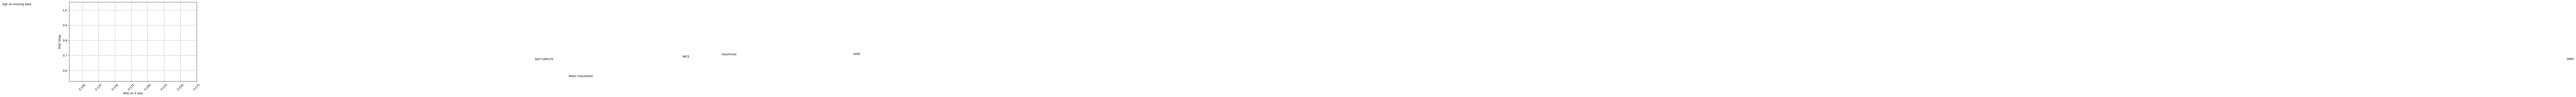

In [14]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on X test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on X test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on X test')
plt.xlim(0.08, 0.275)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

beeswarm plot for class 1


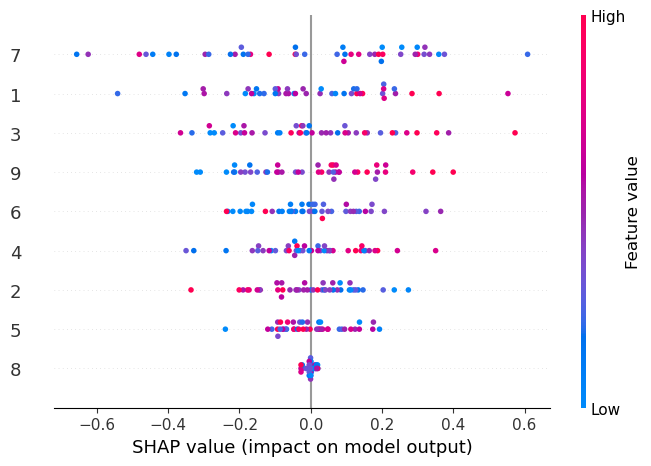

In [15]:
plt.figure()
print('beeswarm plot for class 1')
shap.plots.beeswarm(shap_values_ori[:,:,1], max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()